## Investment Assignment
**Project Brief**<br>
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.<br>

**Business and Data Understanding**<br>
Spark Funds has two minor constraints for investments:
1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

In [452]:
#Importing necessary packages
import pandas as pd #file I/Ofile
import numpy as np #linear algebra

## Checkpoint 1: Data Cleaning
Load the companies and rounds data into two data frames and name them companies and rounds2 respectively

**Input files**<br>
companies.csv -- A table with basic data of companies <br>
rounds2.csv -- A table with details of Funding round <br>
***Encoding***<br>
After doing many trial and errors with differnet encoding felt that **ISO-8859-1** gave better readable results and also unicode_escape gave next better results

In [453]:
companies=pd.read_csv('companies.csv',encoding='ISO-8859-1')
rounds2=pd.read_csv('rounds2.csv',encoding='ISO-8859-1')

In [454]:
#Data load check
companies.tail(15)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66353,/Organization/Zyngenia,Zyngenia,http://www.zyngenia.com,Biotechnology,operating,USA,MD,"Washington, D.C.",Gaithersburg,01-01-2008
66354,/Organization/Zynstra,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011
66355,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
66356,/Organization/Zype,Zype,http://www.zype.com,Cloud Computing|Mobile Advertising|Video|Video...,operating,USA,NY,New York City,New York,01-01-2013
66357,/Organization/Zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01-01-2011
66358,/Organization/Zyraz-Technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
66359,/Organization/Zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
66360,/Organization/Zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
66361,/Organization/Zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
66362,/Organization/Zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014


In [455]:
#Data load check
rounds2.tail(15)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00
114935,/ORGANIZATION/ZYRRA,/funding-round/cc8cd96a500332d5b4f4bcbddb306099,angel,NaN,15-12-2010,875000.00
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00
114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00
114938,/organization/zzish,/funding-round/34b560f672bebeb339a5efa3b27eae5d,grant,NaN,25-02-2015,400000.00
114939,/ORGANIZATION/ZZISH,/funding-round/4c82e18a8e3eab2647719d0fc27ead5f,angel,NaN,31-10-2014,400000.00
114940,/organization/zzish,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.00
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.00
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.00
114943,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.00


**Fixing Rows & Columns**<br>
Even after trying to get best encoding there are still some unreadable characters in the last lines of the dataset which has to be handled. So applied the encode and decode function first **encoded to UTF-8 then decoded to ASCII**. Even this decision was taken based on trial and errors<br>
*permalink,name* columns in companies dataframe and *company_permalink,funding_round_permalink* in rounds2 are to be corrected

In [456]:
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.funding_round_permalink = rounds2.funding_round_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [457]:
#Cross checking the fix
companies.tail(15)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66353,/Organization/Zyngenia,Zyngenia,http://www.zyngenia.com,Biotechnology,operating,USA,MD,"Washington, D.C.",Gaithersburg,01-01-2008
66354,/Organization/Zynstra,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011
66355,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
66356,/Organization/Zype,Zype,http://www.zype.com,Cloud Computing|Mobile Advertising|Video|Video...,operating,USA,NY,New York City,New York,01-01-2013
66357,/Organization/Zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01-01-2011
66358,/Organization/Zyraz-Technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
66359,/Organization/Zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
66360,/Organization/Zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
66361,/Organization/Zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
66362,/Organization/Zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014


In [458]:
#Cross checking the fix
rounds2.tail(15)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00
114935,/ORGANIZATION/ZYRRA,/funding-round/cc8cd96a500332d5b4f4bcbddb306099,angel,NaN,15-12-2010,875000.00
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00
114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00
114938,/organization/zzish,/funding-round/34b560f672bebeb339a5efa3b27eae5d,grant,NaN,25-02-2015,400000.00
114939,/ORGANIZATION/ZZISH,/funding-round/4c82e18a8e3eab2647719d0fc27ead5f,angel,NaN,31-10-2014,400000.00
114940,/organization/zzish,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.00
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.00
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.00
114943,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.00


**Fix Missing values**


In [459]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


*Handling name columns* <br>
The name column has one missing value and form the pattern in the dataset it can be observed that the name of the company mostly is the combination of words after the last slash removing all non alphabetic characters of the column permalink. So the single missing value is been corrected


In [460]:
companies.loc[companies.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/Organization/Tell-It-In,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


In [461]:
#getting the value from permalink column applying the transformations
x=companies.loc[companies.name.isnull()].permalink.apply(lambda x:x.split('/')[-1].replace("-"," "))[56916]
x

'Tell It In'

In [462]:
#Assining the values to the name column and 56916 index row
companies.iloc[56916,1] = x

*Handling country_code,state_code,region,city columns* <br>
By looking at the columns country_code,state_code,region,city with descreasing granularity with dependencies we can try to fill these values using mode of same category

Region vs City

In [463]:
#Data with region values NULL and city value not NULL
companies[(companies.region.isnull()) & (companies.city.notnull())]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
47098,/Organization/Readify,Readify,http://readify.net,Software,operating,AUS,7,NaN,Docklands,01-01-2001
47351,/Organization/Red-Crow,Red Crow,http://www.redcrow.co/,Security,operating,PSE,WE,NaN,Ramallah,NaN


In [464]:
#checking if there are other rows with same city and region value not NaN
companies[companies.city.isin(list(companies[(companies.region.isnull()) & (companies.city.notnull())].city))].region

47098    NaN
47351    NaN
Name: region, dtype: object

As there are no other such rows we cannot populate these values without using any external source which might be outof scope atleast for this problem statement<br>
Analysing of remaining columns in the granularity

In [465]:
l=list(companies[(companies.state_code.isnull()) & (companies.region.notnull())].region.unique())

In [466]:
companies[companies.region.isin(l)].state_code.unique()

array([nan, '38', '34', '16', '29'], dtype=object)

In [467]:
companies[companies.state_code.isin(['38', '34', '16', '29']) & companies.region.isin(l)].region.unique()

array(['COL - Other'], dtype=object)

In [468]:
companies[(companies.region=='COL - Other')]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
5000,/Organization/Aula,Aula 7,http://www.aula7.net,Education|Online Education|Video,operating,VEN,NaN,COL - Other,Caracas,NaN
10383,/Organization/Celotor,Celotor,http://www.celotor.com/,Internet|Investment Management|Messaging,operating,COL,38,COL - Other,Colombiano,NaN
12124,/Organization/Cocodrilo-Dog,Cocodrilo Dog,http://www.cocodrilodog.com,Games|Mobile Devices|Video Games,operating,COL,34,COL - Other,Cundinamarca,01-01-2011
13129,/Organization/Control-De-Pacientes,Control de Pacientes,http://www.controldepacientes.com/,Health Care,operating,VEN,NaN,COL - Other,Caracas,01-01-2009
17591,/Organization/El-Cambur,El Cambur,http://www.elcambur.com.ve/,Design|Digital Media|Graphics|Networking,operating,VEN,NaN,COL - Other,Caracas,NaN
18835,/Organization/Estadeboda,Estadeboda,http://www.estadeboda.com,Information Services|Portals|Weddings,operating,VEN,NaN,COL - Other,Caracas,NaN
29414,/Organization/Jammcard,Jammcard,http://www.jammcard.com,Music|Music Services|Social Media,operating,COL,16,COL - Other,Los Angeles,27-09-2013
30646,/Organization/Kindery,Kindery,http://www.kindery.co,Apps|Comics|Education|Kids,operating,COL,16,COL - Other,GarzÃ³n,24-04-2013
31548,/Organization/Lanzaloya-Com,Lanzaloya.com,http://lanzaloya.com,Internet|PaaS|Services|Software,operating,VEN,NaN,COL - Other,Caracas,NaN
46552,/Organization/Quiro,Quiro,https://ludopia.wordpress.com/,Computers|Technology,operating,VEN,NaN,COL - Other,Caracas,01-01-2013


**We can observe that all nulls are for the region='COL-Other' region and 'Caracas' city so we can cannot populate the missing values**

country_code vs state_code

In [469]:
companies[(companies.country_code.isnull()) & (companies.state_code.notnull())].state_code.unique()

array([], dtype=object)

In [470]:
companies[(companies.country_code.isnull()) & (companies.region.notnull())].region.unique()

array([], dtype=object)

In [471]:
companies[(companies.country_code.isnull()) & (companies.city.notnull())].city.unique()

array([], dtype=object)

**There are no null country_codes with not null state_codes or region or city**

### The columns homepage_url,category_list,status,founded_at are dependent on the company cannot be imputed

In [472]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66368 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [473]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


All the missing values in rounds2 data frame are company and funding type dependent and cannot be imputed unless necessary to analyse

**Standardising the values to compare** <br>
After observing the above iformation permalink in the companies data set can be primary key.<br>
company_permalink of the rounds2 datasets have potential to be foreign key for the permalink in companies data set<br>
So standardising these values

In [474]:
companies.permalink = companies.permalink.str.lower()
companies.name = companies.name.str.lower()
rounds2.company_permalink = rounds2.company_permalink.str.lower()

**UNIQUE VALUES**

In [475]:
print("Number of unique companies in rounds2 dataset are "+str(rounds2.company_permalink.nunique()))

Number of unique companies in rounds2 dataset are 66368


In [476]:
print("Number of unique companies in companies dataset are "+str(companies.permalink.nunique()))

Number of unique companies in companies dataset are 66368


**Question:**
Are there any companies in the rounds2 file which are not  present in companies?

In [477]:
#unique values of permalink in companies data set
companies_un=pd.Series(companies.permalink.unique())

In [478]:
#unique values of permalink in rounds2 data set
rounds2_un=pd.Series(rounds2.company_permalink.unique())

In [479]:
#Difference of round2 vs companies
len(set(rounds2_un).difference(set(companies_un)))

0

**Merging the two data frames for getting more insights**

In [480]:
#Chose inner join as there are no difference between unique values of permalink & company_permalink columns 
#Also we are interested in the rows which are present in both the datasets
master_frame=pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')

In [481]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114949 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [482]:
#How many observations are present in master_frame ?
print("There are {0} observations in master_frame".format(len(master_frame)))

There are 114949 observations in master_frame


In [483]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


By observing the head we understand that the permalink and company_permalink are duplicates as dropping one

In [484]:
master_frame.drop(['permalink'], axis = 1, inplace = True)

In [485]:
master_frame.shape

(114949, 15)

## Checkpoint 2: Funding Type Analysis
Spark Funds wants to choose one of these four investment types for each potential investment they will make.<br>
Considering the first constrain of the spark funds investment type is been choosen i.e "It wants to invest between **5 to 15 million USD per round of investment**"

So need to find the representative value of each investment type to take the decision. To take the representative values we can observe that there are many NaN values in the raised_amount_usd field which has to be taken case

In [486]:
master_frame[master_frame['raised_amount_usd'].isnull()].head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,nan,one inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,nan,1-4 all,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,nan,1.618 technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013


The data type of the raised_amount_usd column is float so we can fill NaNs using mean or median. But from the below table we can see there are huge outliers so taking mean to fill the values will impute huge bias.<br> so I chose **Median to fill nas'**

In [487]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
master_frame.groupby('funding_round_type').describe()

raised_amount_usd                                     \
                                  count         mean          std      min   
funding_round_type                                                           
angel                           4860.00    958694.47   7404397.12     0.00   
convertible_note                1447.00   1453438.54   8043846.14     0.00   
debt_financing                  6682.00  17043526.02 280320356.61     0.00   
equity_crowdfunding             1228.00    538368.21   1719329.42     0.00   
grant                           2124.00   4300576.34  25587424.15     0.00   
non_equity_assistance             73.00    411203.05   1771747.25     0.00   
post_ipo_debt                    152.00 168704571.82 602473804.43 70000.00   
post_ipo_equity                  628.00  82182493.87 469188915.85    77.00   
private_equity                  1936.00  73308593.03 198113458.41     0.00   
product_crowdfunding             386.00   1363131.07   4698379.78     0.00   
secondary_market                  30.00  79649630.10 140103760.22  2323.00   
seed                           23603.00    719818.00   2221732.80     0.00   
undisclosed                     1582.00  19242370.23 199323809.16     0.00   
venture                        50228.00  11748949.13  86352066.56     0.00   

                                                                         
                             25%         50%         75%            max  
funding_round_type                                                       
angel                  150000.00   400000.00  1000000.00   494511992.00  
convertible_note        78847.50   272000.00  1000000.00   185048285.00  
debt_financing         330484.25  1100000.00  4000000.00 21271935000.00  
equity_crowdfunding      7000.00   100000.00   395901.00    27400000.00  
grant                   50000.00   201684.00  1700000.00   750000000.00  
non_equity_assistance   25000.00    60000.00   125000.00    15000000.00  
post_ipo_debt         4000000.00 19950000.00 60000000.00  5800000000.00  
post_ipo_equity       3764794.00 12262852.50 40000000.00 10664943639.00  
private_equity        5000000.00 20000000.00 75000000.00  4745460219.00  
product_crowdfunding    40241.75   183915.00   735000.00    52000000.00  
secondary_market      5025000.00 32600000.00 84475000.00   680611554.00  
seed                    55000.00   275000.00  1000000.00   200000000.00  
undisclosed            220000.00  1018680.00  4848804.00  5000000000.00  
venture               1600901.75  5000000.00 12000000.00 17600000000.00

In [488]:
#Imputing null values
master_frame["raised_amount_usd"] = master_frame.groupby("funding_round_type").transform(lambda x: x.fillna(x.median()))


In [489]:
#Re validating for Nulls
master_frame[master_frame['raised_amount_usd'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [490]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          114949 non-null float64
name                       114949 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


## **Representative values for each funding_round_type**

In [491]:
desc=master_frame.groupby('funding_round_type').describe()
desc

raised_amount_usd                                     \
                                  count         mean          std      min   
funding_round_type                                                           
angel                           6094.00    845562.05   6616035.31     0.00   
convertible_note                1817.00   1212859.42   7193536.17     0.00   
debt_financing                  6895.00  16550999.40 275969721.59     0.00   
equity_crowdfunding             3257.00    265279.76   1076630.08     0.00   
grant                           2200.00   4158978.24  25152517.14     0.00   
non_equity_assistance            191.00    194229.44   1104004.89     0.00   
post_ipo_debt                    152.00 168704571.82 602473804.43 70000.00   
post_ipo_equity                  638.00  81086574.73 465572682.92    77.00   
private_equity                  2285.00  65166492.82 183356299.71     0.00   
product_crowdfunding             410.00   1294103.79   4566864.58     0.00   
secondary_market                  95.00  47457777.93  80865089.08  2323.00   
seed                           30524.00    618960.14   1962534.98     0.00   
undisclosed                     4897.00   6905933.00 113587479.76     0.00   
venture                        55494.00  11108520.14  82176584.61     0.00   

                                                                          
                              25%         50%         75%            max  
funding_round_type                                                        
angel                   200000.00   400000.00   750000.00   494511992.00  
convertible_note        100000.00   272000.00   685170.00   185048285.00  
debt_financing          350000.00  1100000.00  3701272.50 21271935000.00  
equity_crowdfunding     100000.00   100000.00   100000.00    27400000.00  
grant                    50000.00   201684.00  1500000.00   750000000.00  
non_equity_assistance    60000.00    60000.00    60000.00    15000000.00  
post_ipo_debt          4000000.00 19950000.00 60000000.00  5800000000.00  
post_ipo_equity        3884781.00 12262852.50 40000000.00 10664943639.00  
private_equity         6500000.00 20000000.00 62400000.00  4745460219.00  
product_crowdfunding     50154.25   183915.00   628839.25    52000000.00  
secondary_market      32600000.00 32600000.00 32600000.00   680611554.00  
seed                    100000.00   275000.00   660714.00   200000000.00  
undisclosed            1018680.00  1018680.00  1018680.00  5000000000.00  
venture                2000000.00  5000000.00 10500000.00 17600000000.00

In [492]:
desc[('raised_amount_usd', 'mean')]-desc[('raised_amount_usd', '50%')]

funding_round_type
angel                      445562.05
convertible_note           940859.42
debt_financing           15450999.40
equity_crowdfunding        165279.76
grant                     3957294.24
non_equity_assistance      134229.44
post_ipo_debt           148754571.82
post_ipo_equity          68823722.23
private_equity           45166492.82
product_crowdfunding      1110188.79
secondary_market         14857777.93
seed                       343960.14
undisclosed               5887253.00
venture                   6108520.14
dtype: float64

Huge difference between mean and median and std is also hight. There are also more outliers which suggests<br>
####  MEDIAN to be used as representation metric

In [493]:
#Calculating median of each funding_round_type
raised_amount_usd_rep = master_frame.groupby('funding_round_type').raised_amount_usd.median()
raised_amount_usd_rep

funding_round_type
angel                     400000.00
convertible_note          272000.00
debt_financing           1100000.00
equity_crowdfunding       100000.00
grant                     201684.00
non_equity_assistance      60000.00
post_ipo_debt           19950000.00
post_ipo_equity         12262852.50
private_equity          20000000.00
product_crowdfunding      183915.00
secondary_market        32600000.00
seed                      275000.00
undisclosed              1018680.00
venture                  5000000.00
Name: raised_amount_usd, dtype: float64

In [494]:
raised_amount_usd_rep[['seed','angel','venture','private_equity']].to_frame().reset_index()

,funding_round_type,raised_amount_usd
0,seed,275000.00
1,angel,400000.00
2,venture,5000000.00
3,private_equity,20000000.00


In [495]:
raised_amount_usd_rep.between(5000000, 15000000, inclusive = True)


funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity           True
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

The above results show that of Venture,Seed,Angel,Private Equity only **venture** funding type falls in the range

## Checkpoint 3: Country Analysis
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

**Data Filtering**

In [496]:
#Filtering the data only with funding type as venture for the ease of analysis
master_frame_venture=master_frame.loc[master_frame.funding_round_type == 'venture'].copy()

In [497]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 15 columns):
company_permalink          55494 non-null object
funding_round_permalink    55494 non-null object
funding_round_type         55494 non-null object
funding_round_code         30985 non-null object
funded_at                  55494 non-null object
raised_amount_usd          55494 non-null float64
name                       55494 non-null object
homepage_url               52549 non-null object
category_list              54362 non-null object
status                     55494 non-null object
country_code               52619 non-null object
state_code                 51698 non-null object
region                     51940 non-null object
city                       51940 non-null object
founded_at                 44303 non-null object
dtypes: float64(1), object(14)
memory usage: 6.8+ MB


In [498]:
#resetting the index after filtering
master_frame_venture.reset_index(inplace=True,drop=True)

In [499]:
master_frame_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.00,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.00,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [500]:
#Grouping the data set with country_code and getting the sum of all investments
a=pd.DataFrame(master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False))
a.reset_index(inplace=True)
a

,country_code,raised_amount_usd
0,USA,433675842796.00
1,CHN,42450418773.00
2,GBR,21485627416.00
3,IND,15231858718.00
4,CAN,10033332317.00
...,...,...
98,ECU,965850.00
99,MCO,657000.00
100,SAU,500000.00
101,GTM,300000.00


**TOP 9**

In [501]:
#Filtering top 9
top_9=a.head(9).copy()
top_9

,country_code,raised_amount_usd
0,USA,433675842796.00
1,CHN,42450418773.00
2,GBR,21485627416.00
3,IND,15231858718.00
4,CAN,10033332317.00
5,FRA,7599536732.00
6,DEU,7486959822.00
7,ISR,7477514579.00
8,JPN,3583676611.00


**TOP 3 English speaking countries**

I refered to the list of english speaking countries from wikipedia page (https://en.wikipedia.org/wiki/List_of_countries_by_English-speaking_population) and manually chose top 3 english speaking ccountries from the top 9 they are:

**USA - United States of America <br>
GBR - United Kingdom (Great Britain)<br>
IND  -  India**

## Checkpoint 4: Sector Analysis 1
There are eight main sectors (named main_sector) listed in the mapping file.Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe.<br>
CEO come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.<br>
**Outcomes:<br>**
1. Extract the primary sector of each category list from the category_list column
2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [502]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.00,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [503]:
#As there are few NaNs in category_list column which are stopping from applying the string function split
#I am filling na with empty string
master_frame.category_list=master_frame.category_list.fillna("")

In [504]:
#Applying the split and extracting the first string after splitting
master_frame['primary_category']=master_frame.category_list.apply(lambda x:x.split('|')[0])

In [505]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          114949 non-null float64
name                       114949 non-null object
homepage_url               108815 non-null object
category_list              114949 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
primary_category           114949 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


**Reading the  mapping data set as it is in wide format I named it wide_mapping before converting to main mapping dataframe**

In [506]:
#Reading the  mapping data there is no specific encoding required for this
wide_mapping=pd.read_csv('mapping.csv')

In [507]:
wide_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


**Converting the wide formated dataframe to long format using MELT function**

In [508]:
#list of value_vars
value_vars=list(wide_mapping.columns[1:])
value_vars

['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [509]:
#list of id_vars which are remaining after selecting value_vars
id_vars=list(np.setdiff1d(wide_mapping.columns,value_vars))
id_vars

['category_list']

In [510]:
#Applying the melt function and naming the output long format as mapping dataframe
mapping=pd.melt(wide_mapping,id_vars=id_vars,value_vars=value_vars)
#Removing rows with value == 0
mapping=mapping.loc[~(mapping.value==0)]
#Dropping the value axis
mapping=mapping.drop(['value'],axis=1)
#Resetting the index
mapping.reset_index(inplace=True,drop=True)
#Renaming the column variable to sector which is more representative
mapping=mapping.rename(columns={'variable':'main_sector'})

In [511]:
mapping.head()

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


### Merging

In [512]:
#Merging main dataframe with mapping dataframe on primary sector vs category_list 
#Performing an INNER JOIN as we are interested in grouping by category and donot want it to be NULL
mc=pd.merge(master_frame,mapping,left_on='primary_category',right_on='category_list')

In [513]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103397 entries, 0 to 103396
Data columns (total 18 columns):
company_permalink          103397 non-null object
funding_round_permalink    103397 non-null object
funding_round_type         103397 non-null object
funding_round_code         28422 non-null object
funded_at                  103397 non-null object
raised_amount_usd          103397 non-null float64
name                       103397 non-null object
homepage_url               98488 non-null object
category_list_x            103397 non-null object
status                     103397 non-null object
country_code               96812 non-null object
state_code                 94766 non-null object
region                     95431 non-null object
city                       95434 non-null object
founded_at                 85706 non-null object
primary_category           103397 non-null object
category_list_y            103397 non-null object
main_sector                103397 non-null ob

In [514]:
mc.shape

(103397, 18)

In [515]:
mc.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_category,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
4,/organization/a-b-productions,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,1100000.00,a.b productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,Media,Media,Entertainment


## Checkpoint 5: Sector Analysis 2
Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).
* Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.



In [516]:
#USA data segment with index resetted
D1=mc.loc[(mc['funding_round_type']=='venture') & (mc['raised_amount_usd'].between(5000000, 15000000, inclusive = True)) & (mc['country_code']=='USA')].reset_index(drop = True)

In [517]:
#GBR data segment with index resetted
D2=mc.loc[(mc['funding_round_type']=='venture') & (mc['raised_amount_usd'].between(5000000, 15000000, inclusive = True)) & (mc['country_code']=='GBR')].reset_index(drop = True)

In [518]:
#IND data segment with index resetted
D3=mc.loc[(mc['funding_round_type']=='venture') & (mc['raised_amount_usd'].between(5000000, 15000000, inclusive = True)) & (mc['country_code']=='IND')].reset_index(drop = True)

In [519]:
#Total number of Investments in Country1
print(D1.company_permalink.count())

#Total amount of investmemts in Country1
print(D1.raised_amount_usd.sum(), end='\n\n********************************************\n\n')

#Top Sector name (no. of investment-wise) for Country1
print(D1.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False))

print(end = '\n\n*******************************************************************************************\n\n')

#For point 3 (top sector count-wise), which company received the highest investment?
print(D1[D1.main_sector == "Others"].groupby(['company_permalink','name'])[['raised_amount_usd']].
                    sum().reset_index().sort_values(by = 'raised_amount_usd', ascending = False).iloc[[0]])

print(end = '\n\n********************************************************************************************\n\n')

#For point 4 (second best sector count-wise), which company received the highest investment?
print(D1[D1.main_sector == "Cleantech / Semiconductors"].groupby(['company_permalink','name'])[['raised_amount_usd']].
                sum().reset_index().sort_values(by = 'raised_amount_usd', ascending = False).iloc[[0]])

13044
109136524549.0

********************************************

                               main_sector  company_permalink
6                                   Others               3373
1               Cleantech / Semiconductors               2561
7  Social, Finance, Analytics, Advertising               2309
5               News, Search and Messaging               1824
3                                   Health               1048
4                            Manufacturing                989
2                            Entertainment                712
0                      Automotive & Sports                228


*******************************************************************************************

              company_permalink         name  raised_amount_usd
2183  /organization/virtustream  virtustream        64300000.00


********************************************************************************************

          company_permalink     name  raised_amount_usd

In [520]:
#Total number of Investments in Country2
print(D2.company_permalink.count())

#Total amount of investmemts in Country2
print(D2.raised_amount_usd.sum(), end='\n\n********************************************\n\n')

#Top Sector name (no. of investment-wise) for Country2
print(D2.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False))

print(end = '\n\n*******************************************************************************************\n\n')

#For point 3 (top sector count-wise), which company received the highest investment?
print(D2[D2.main_sector == "Others"].groupby(['company_permalink','name'])[['raised_amount_usd']].
                    sum().reset_index().sort_values(by = 'raised_amount_usd', ascending = False).iloc[[0]])

print(end = '\n\n********************************************************************************************\n\n')

#For point 4 (second best sector count-wise), which company received the highest investment?
print(D2[D2.main_sector == "Cleantech / Semiconductors"].groupby(['company_permalink','name'])[['raised_amount_usd']].
                sum().reset_index().sort_values(by = 'raised_amount_usd', ascending = False).iloc[[0]])

781
6048704358.0

********************************************

                               main_sector  company_permalink
6                                   Others                207
1               Cleantech / Semiconductors                150
7  Social, Finance, Analytics, Advertising                139
5               News, Search and Messaging                 97
2                            Entertainment                 78
4                            Manufacturing                 52
3                                   Health                 32
0                      Automotive & Sports                 26


*******************************************************************************************

               company_permalink            name  raised_amount_usd
49  /organization/electric-cloud  electric cloud        37000000.00


********************************************************************************************

            company_permalink         name  raised_

In [521]:
#Total number of Investments in Country3
print(D3.company_permalink.count())

#Total amount of investmemts in Country3
print(D3.raised_amount_usd.sum(), end='\n\n********************************************\n\n')

#Top Sector name (no. of investment-wise) for Country3
print(D3.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False))

print(end = '\n\n*******************************************************************************************\n\n')

#For point 3 (top sector count-wise), which company received the highest investment?
print(D3[D3.main_sector == "Others"].groupby(['company_permalink','name'])[['raised_amount_usd']].
                     sum().reset_index().sort_values(by = 'raised_amount_usd', ascending = False).iloc[[0]])

print(end = '\n\n********************************************************************************************\n\n')

#For point 4 (second best sector count-wise), which company received the highest investment?
print(D3[D3.main_sector == "News, Search and Messaging"].groupby(['company_permalink','name'])[['raised_amount_usd']].
                sum().reset_index().sort_values(by = 'raised_amount_usd', ascending = False).iloc[[0]])


444
3408537552.0

********************************************

                               main_sector  company_permalink
6                                   Others                157
5               News, Search and Messaging                 76
7  Social, Finance, Analytics, Advertising                 59
2                            Entertainment                 46
3                                   Health                 33
4                            Manufacturing                 30
1               Cleantech / Semiconductors                 29
0                      Automotive & Sports                 14


*******************************************************************************************

             company_permalink          name  raised_amount_usd
37  /organization/firstcry-com  firstcry.com        39000000.00


********************************************************************************************

                                 company_permalink     name

## Checkpoint 6: Plots
Present findings to the CEO of Spark Funds using plots.
1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   
2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                                                                                                                             
3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.



**The below bar plot makes it very clear that 'Venture' funding type is best suited for Spark Funds as it has average investment amount range between 5 m to 15 m USD**

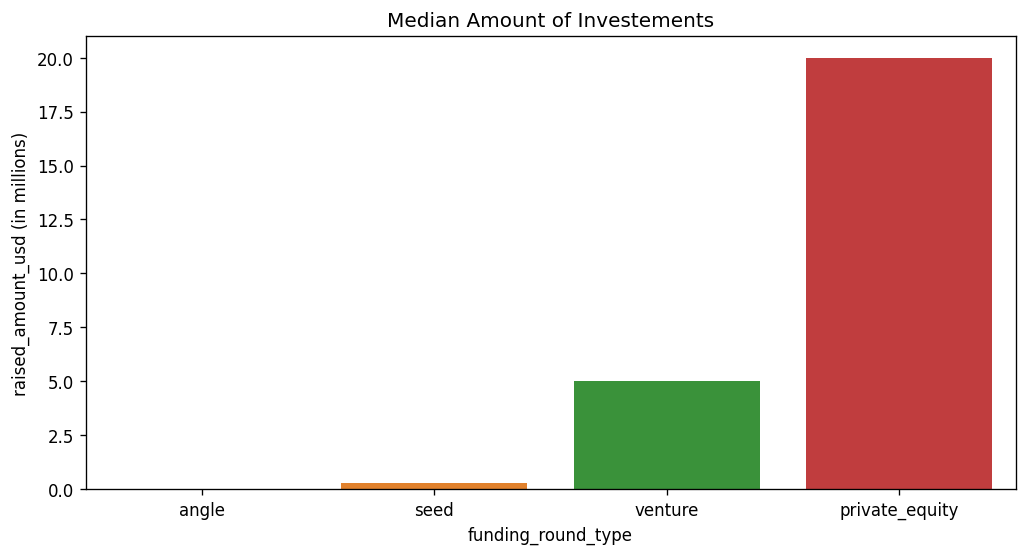

In [522]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x=master_frame['funding_round_type'],y=master_frame['raised_amount_usd']/1000000,estimator=np.median,order=["angle","seed","venture","private_equity"],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Median Amount of Investements") 
plt.show()


**Steps Followed**<br>
1. Added a new column 'English_Speaking' which says whether the country is english speaking country the input for the column is taken from wikipedia page.
2. Used a bivariate bar plot graph to show Total Investment Amount (Y-Axis) for Top 9 Countries (X-Axis) with hue as English Speaking Flag.

In [523]:
top_9['English_Speaking'] = ['Y','N','Y','Y','Y','N','N','Y','N']
top_9

,country_code,raised_amount_usd,English_Speaking
0,USA,433675842796.00,Y
1,CHN,42450418773.00,N
2,GBR,21485627416.00,Y
3,IND,15231858718.00,Y
4,CAN,10033332317.00,Y
5,FRA,7599536732.00,N
6,DEU,7486959822.00,N
7,ISR,7477514579.00,Y
8,JPN,3583676611.00,N


**The below bar graph makes it very clear that the top 3 highly invested English speaking countries are USA, GBR, IND**

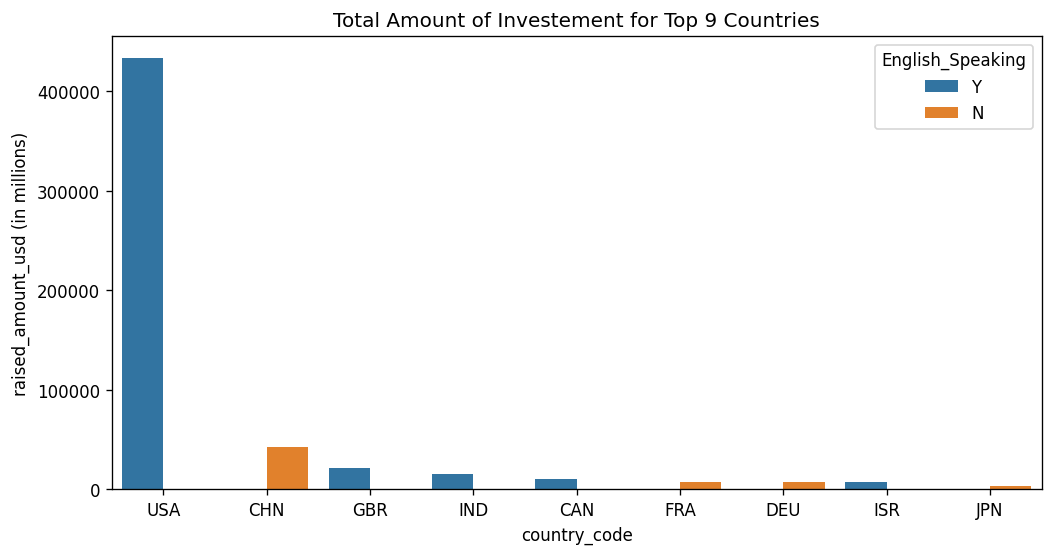

In [524]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(data=top_9,x=top_9['country_code'],y=top_9['raised_amount_usd']/1000000,hue='English_Speaking',ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Total Amount of Investement for Top 9 Countries") 
plt.show()

**Steps Followed**<br>
1. Added a new column 'English_Speaking' which says whether the country is english speaking country the input for the column is taken from wikipedia page.
2. Used a bivariate bar plot graph to show Total Invenstment Amount (Y-Axis) for Top 9 Countries (X-Axis) with hue as English Speaking Flag.

In [525]:
p_temp_1=D1.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False)
p_temp_2=D2.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False)
p_temp_3=D3.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False)
p_temp_1.rename(columns = {"company_permalink":"Total_num_Investments"},inplace=True)
p_temp_2.rename(columns = {"company_permalink":"Total_num_Investments"},inplace=True)
p_temp_3.rename(columns = {"company_permalink":"Total_num_Investments"},inplace=True)

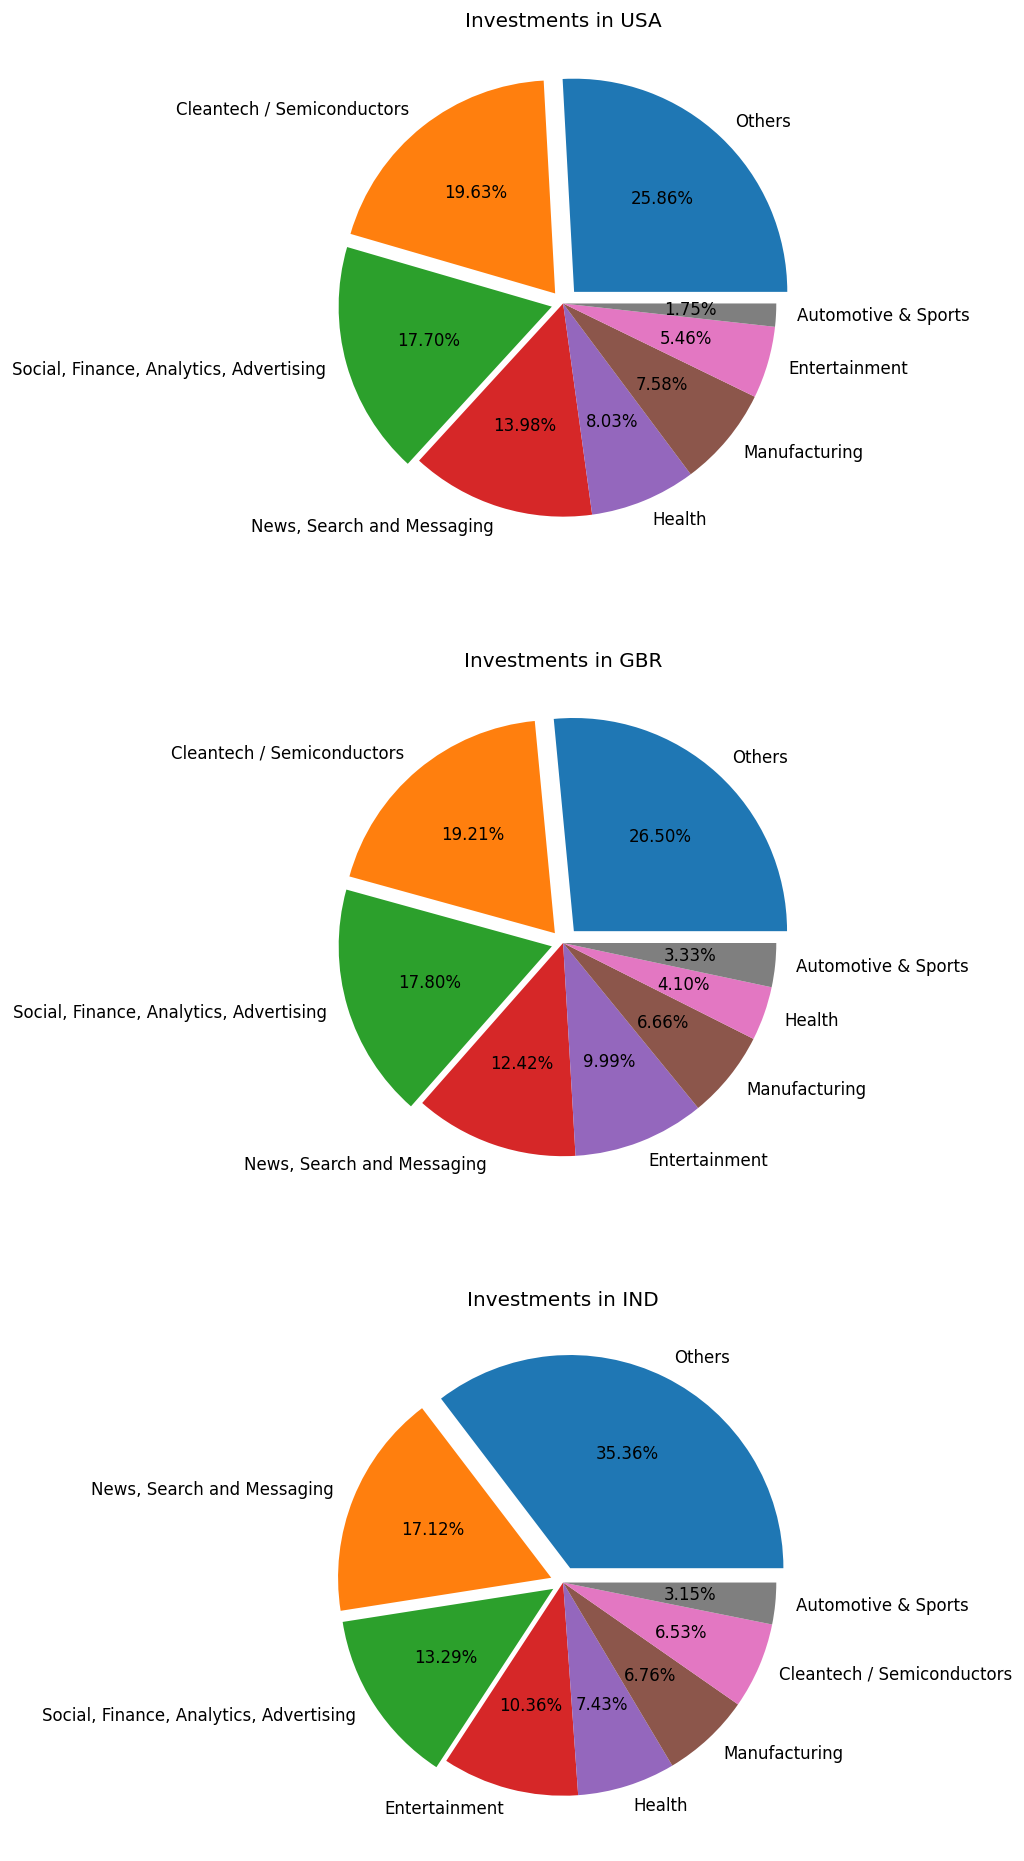

In [526]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= [20.0,20.0],dpi=120,edgecolor='c',frameon=True)
explode = (0.075,0.06,0.055,0.0,0.0,0.0,0.0,0.0)

plt.subplot(311)
plt.title('Investments in USA')
plt.pie(p_temp_1.Total_num_Investments,explode=explode,labels=list(p_temp_1.main_sector),autopct='%1.2f%%')

plt.subplot(312)
plt.title('Investments in GBR')
plt.pie(p_temp_2.Total_num_Investments,explode=explode,labels=list(p_temp_2.main_sector),autopct='%1.2f%%')


plt.subplot(313)
plt.title('Investments in IND')
plt.pie(p_temp_3.Total_num_Investments,explode=explode,labels=list(p_temp_3.main_sector),autopct='%1.2f%%')

plt.show()

In [527]:
temp_D1=D1.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False).head(3).copy()
temp_D1.reset_index(inplace=True,drop=True)
temp_D1['Country']='USA'
temp_D1

,main_sector,company_permalink,Country
0,Others,3373,USA
1,Cleantech / Semiconductors,2561,USA
2,"Social, Finance, Analytics, Advertising",2309,USA


In [529]:
temp_D2=D2.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False).head(3).copy()
temp_D2.reset_index(inplace=True,drop=True)
temp_D2['Country']='GBR'
temp_D2

,main_sector,company_permalink,Country
0,Others,207,GBR
1,Cleantech / Semiconductors,150,GBR
2,"Social, Finance, Analytics, Advertising",139,GBR


In [530]:
temp_D3=D3.groupby('main_sector')['company_permalink'].count().reset_index().sort_values(by= 'company_permalink', ascending=False).head(3).copy()
temp_D3.reset_index(inplace=True,drop=True)
temp_D3['Country']='IND'
temp_D3

,main_sector,company_permalink,Country
0,Others,157,IND
1,"News, Search and Messaging",76,IND
2,"Social, Finance, Analytics, Advertising",59,IND


In [531]:
Temp=pd.concat([temp_D1,temp_D2,temp_D3])
Temp.reset_index(inplace=True,drop=True)
Temp.rename(columns = {"company_permalink":"Total_num_Investments"},inplace=True)
Temp

,main_sector,Total_num_Investments,Country
0,Others,3373,USA
1,Cleantech / Semiconductors,2561,USA
2,"Social, Finance, Analytics, Advertising",2309,USA
3,Others,207,GBR
4,Cleantech / Semiconductors,150,GBR
5,"Social, Finance, Analytics, Advertising",139,GBR
6,Others,157,IND
7,"News, Search and Messaging",76,IND
8,"Social, Finance, Analytics, Advertising",59,IND


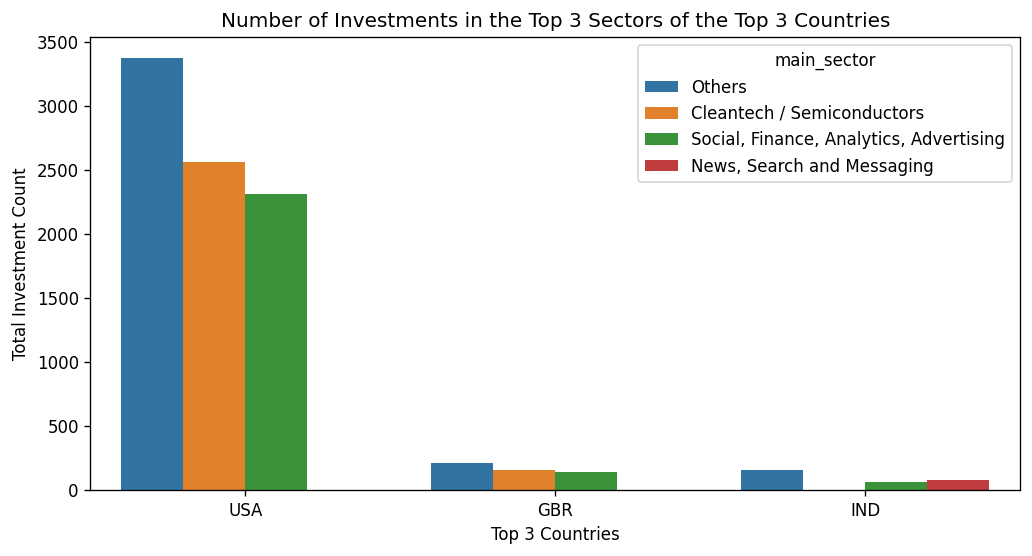

In [532]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x='Country', y='Total_num_Investments', hue='main_sector',data=Temp)
plt.ylabel("Total Investment Count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries") 
plt.show()

## Sub-Category Analysis in Others Category <br>
From the bar plot in the previous slide it is evident that “Others” is the segment which is in the first place in number of investments. Others category is very vague to invest so we can analyse in depth to see what sector in others is driving for these results.

We can see that software category almost ruled out all other categories except in IND where it is in second place. All the top categories like Enterprise software, E-commerce, security, web hosting can be termed as Applications related to software.<br>
So we can say that **Software and other application** of it are the most and heavily invested sectors in almost any country (Top 3 specifically).

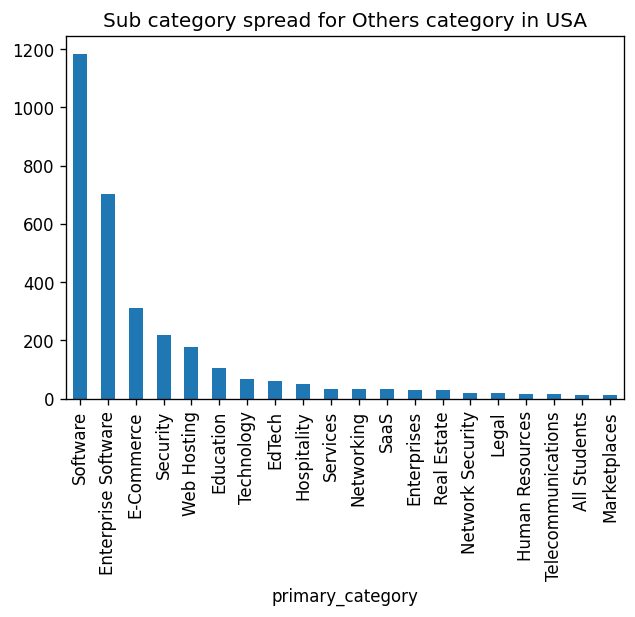

In [533]:
plt.figure(dpi=120,frameon=True)
plt.title("Sub category spread for Others category in USA")
D1[D1['main_sector']=="Others"].groupby(['primary_category']).funding_round_permalink.count().sort_values(ascending=False).head(20).plot.bar()
plt.show()

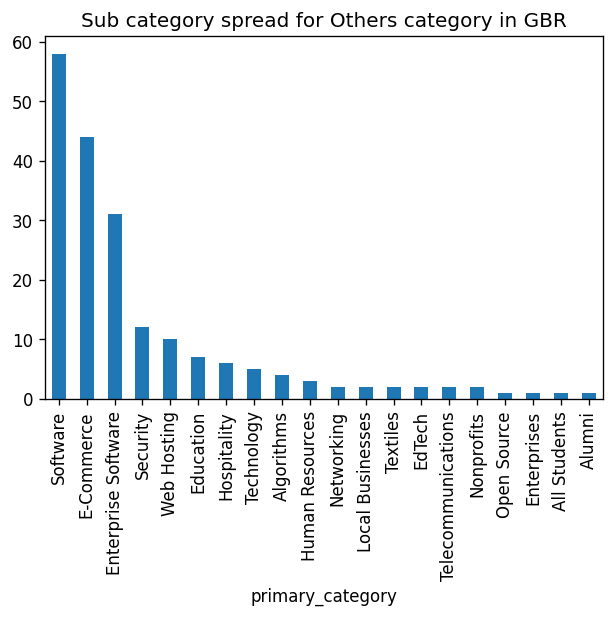

In [534]:
plt.figure(dpi=120,frameon=True)
plt.title("Sub category spread for Others category in GBR")
D2[D2['main_sector']=="Others"].groupby(['primary_category']).funding_round_permalink.count().sort_values(ascending=False).head(20).plot.bar()
plt.show()

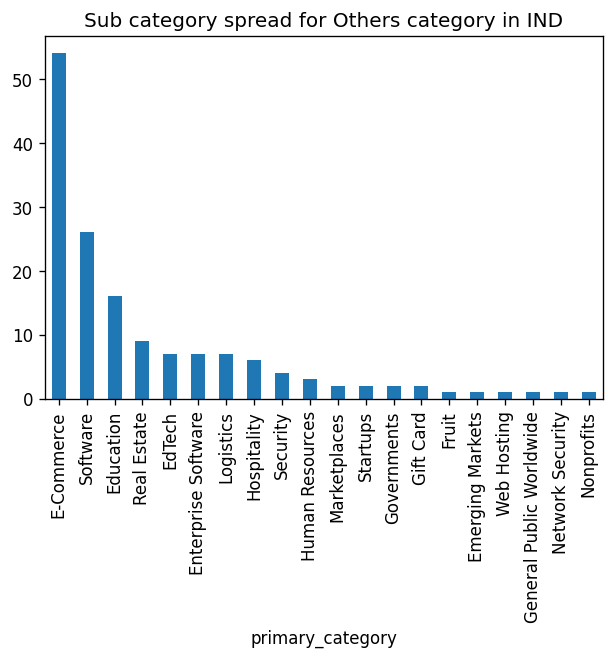

In [535]:
plt.figure(dpi=120,frameon=True)
plt.title("Sub category spread for Others category in IND")
D3[D3['main_sector']=="Others"].groupby(['primary_category']).funding_round_permalink.count().sort_values(ascending=False).head(20).plot.bar()
plt.show()